## EDA

Importaciones

In [22]:
import pandas as pd # Para trabajar con los datasets
import matplotlib.pyplot as plt # Para graficar
import seaborn as sns # Tambien para graficar
import numpy as np # Para trabajar con los nulos y los numeros
import datetime # Para trabajar con las fechas

In [23]:
merge = pd.read_csv('../Data/merge.csv') # Leer los datos completos

## Outliers

Text(0.5, 1.0, 'Rango de Hora')

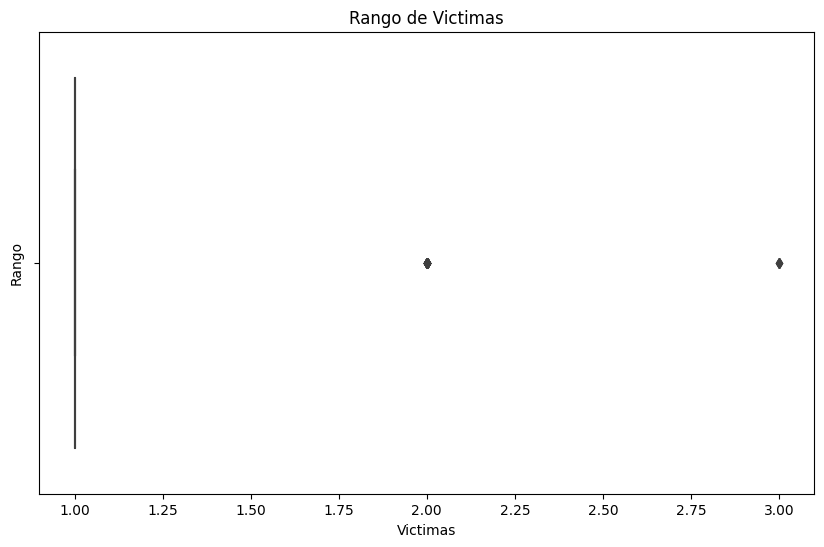

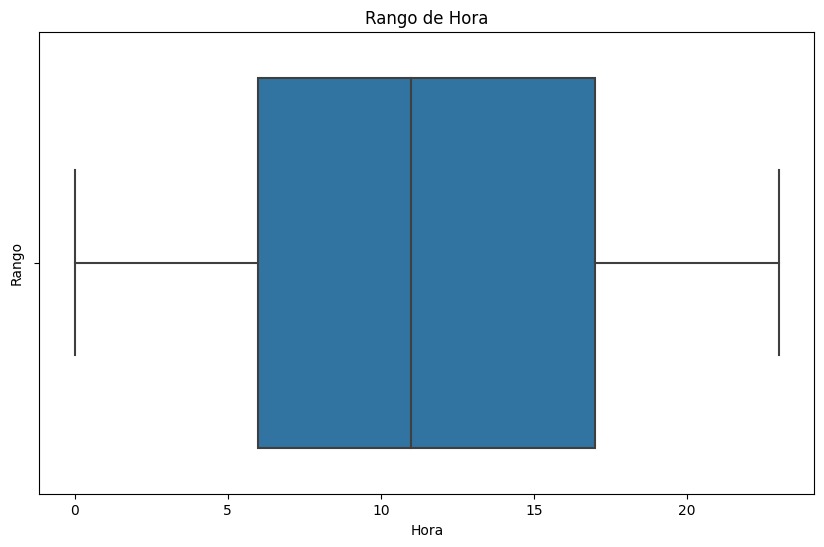

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Victimas', data=merge) # Creamos un boxplot sobre los precios
plt.ylabel('Rango')
plt.xlabel('Victimas')
plt.title('Rango de Victimas')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Hora', data=merge) # Creamos un boxplot sobre los precios
plt.ylabel('Rango')
plt.xlabel('Hora')
plt.title('Rango de Hora')

No encontramos outliers o valores atipicos en las horas ni en la cantidad de victimas

Text(0.5, 1.0, 'Rango de Hora')

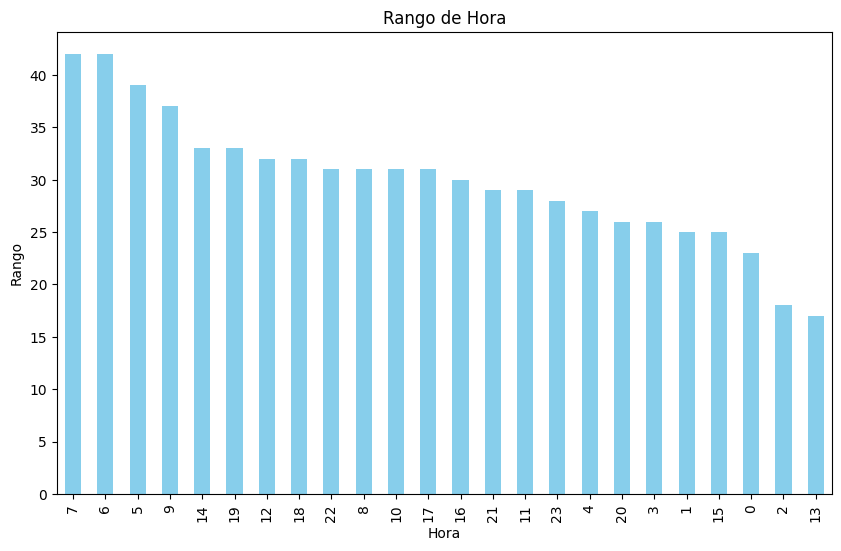

In [25]:
plt.figure(figsize=(10,6))
data = merge.Hora.value_counts()
data.plot(kind='bar',color='skyblue')
plt.ylabel('Rango')
plt.xlabel('Hora')
plt.title('Rango de Hora')

Aqui podemos extraer puntos de interes:

1_ Las fechas donde ocurren mas accidentes son entre las 5am y las 7am, esto se puede deber a que en esos horarios la gente sale de sus casas con destino a su trabajo, y es un horario muy circulado ademas de que es temprano y tal vez el estar recien despierto afecte a la calidad del manejo.
Ademas que las fiestas nocturnas, terminan en esos horarios, y hay gente alcoholizada viajando en esos horarios.

2_ Los horarios donde menos accidentes hay son a las 13pm ya que es un horario promedio de almuerzo y no hay mucho transito vehicular, y a las 12pm y 2am, que son horarios poco recurrentes de gente en la calle.

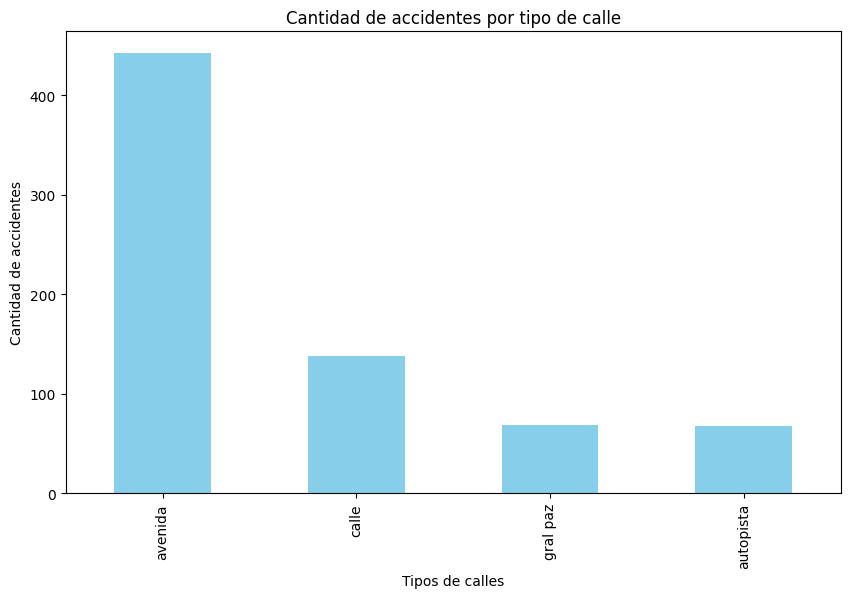

In [26]:
plt.figure(figsize=(10,6))
data = merge.Tipo_calle.value_counts()
data.plot(kind='bar',color='skyblue')
plt.xlabel('Tipos de calles')
plt.ylabel('Cantidad de accidentes')
plt.title('Cantidad de accidentes por tipo de calle')
plt.show()

Los accidentes suceden por mucha mayoria, en avenidas

In [27]:
merge['Fecha'] = merge['Fecha'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))

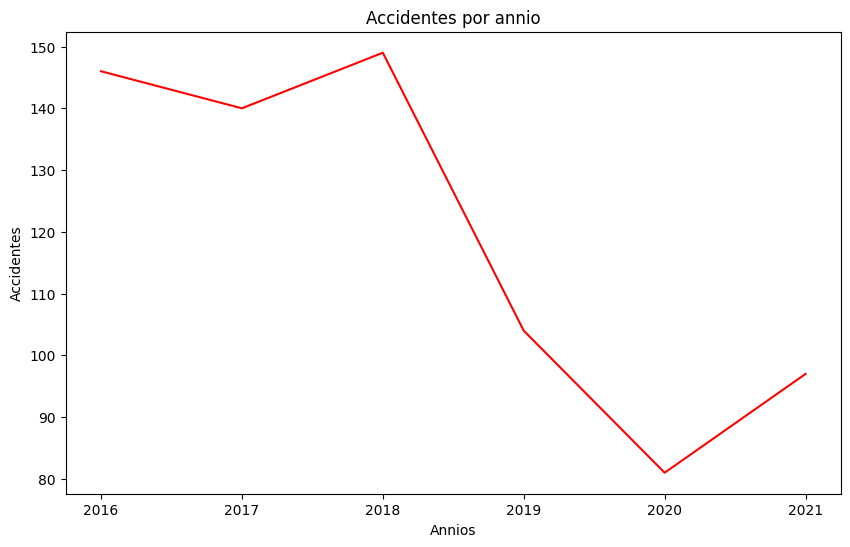

In [28]:
plt.figure(figsize=(10,6))
registros_por_anio = merge.groupby(merge['Fecha'].dt.year)['Fecha'].count()
sns.lineplot(registros_por_anio, color='red')
plt.xlabel('Annios')
plt.ylabel('Accidentes')
plt.title('Accidentes por annio')
plt.show()

Aqui podemos sacar unas conclusiones, y es que entre 2019 y 2021 fue el pico minimo de registros de accidentes viales en CABA, esto claramente es referenciado a la pandemia y como esta afecto a la cantidad de transito vehiculas y peatonal en la Ciudad de Buenos Aires.

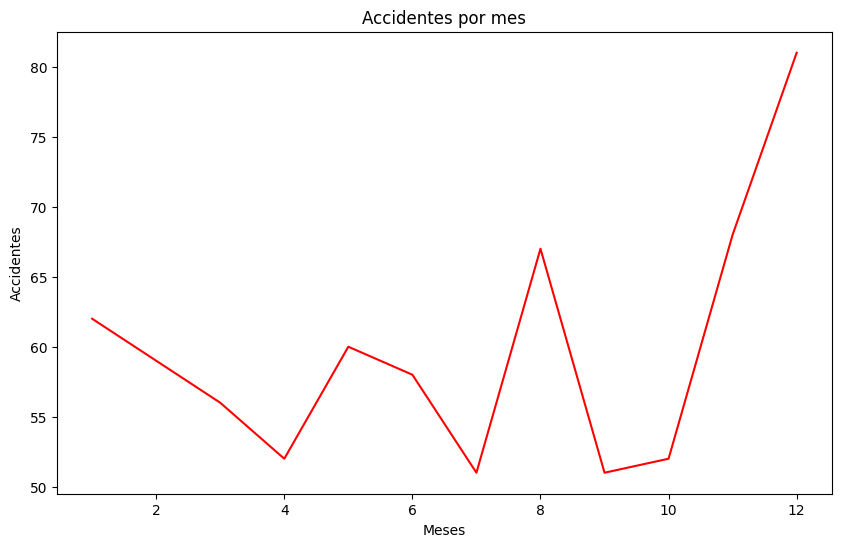

In [29]:
plt.figure(figsize=(10,6))
registros_por_anio = merge.groupby(merge['Fecha'].dt.month)['Fecha'].count()
sns.lineplot(registros_por_anio, color='red')
plt.xlabel('Meses')
plt.ylabel('Accidentes')
plt.title('Accidentes por mes')
plt.show()

Vemos que si analizamos por mes durante un año natural, tenemos picos altos en Mayo, Agosto y Diciembre, estos picos pueden estar relacionados a las etapas de vacaciones de los habitantes, ya que por ejemplo en Agosto son las famosas 'Vacaciones de invierno' y en Diciembre estan las festividades de Navidad y posteriormente año nuevo, donde hay mucho transito y gente alcoholizada.

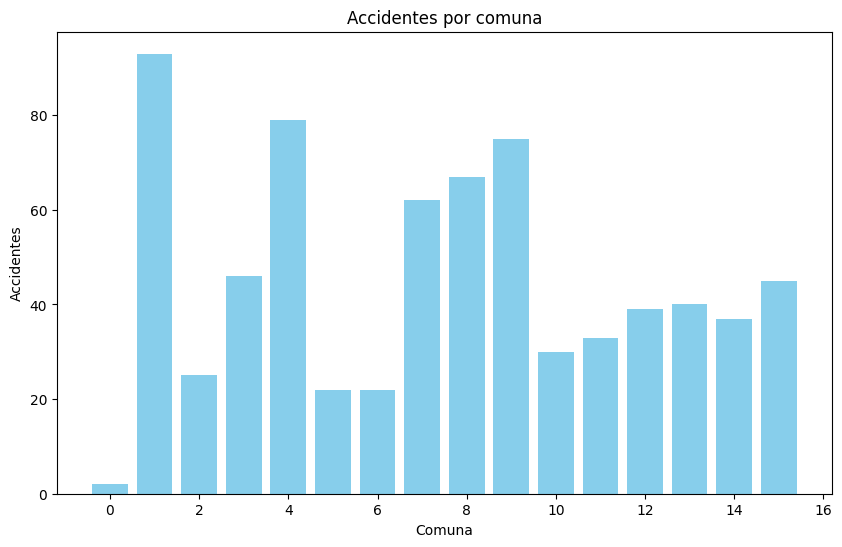

In [30]:
registros_por_comuna = merge.groupby(merge['Comuna'])['Id_hecho'].count()
comunas = registros_por_comuna.index
cantidad_accidentes = registros_por_comuna.values
plt.figure(figsize=(10,6))
plt.bar(comunas, cantidad_accidentes, color='skyblue')
plt.xlabel('Comuna')
plt.ylabel('Accidentes')
plt.title('Accidentes por comuna')
plt.show()

Si hacemos un analisis por comuna vemos que las comunas 1 es la mas habitual donde ocurren accidentes, y esto tiene sentido ya que la comuna 1 (Puerto Madero, San Telmo, Retiro y la zona dedl Obelisco) es la comuna mas transitada y con mas densidad de vehiculos y peatones, entonces es la zona mas fragil ante accidentes viales principalmente.

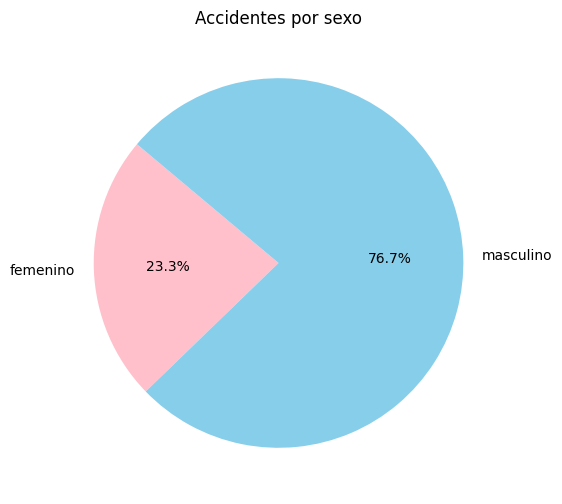

In [31]:
registros_por_sexo = merge.groupby(merge['Sexo'])['Id_hecho'].count()
sexos = registros_por_sexo.index  # Índice de las comunas
cantidad_accidentes = registros_por_sexo.values  #
plt.figure(figsize=(10,6))
plt.pie(cantidad_accidentes, labels=sexos, autopct='%1.1f%%', startangle=140, colors=['pink','skyblue'])
plt.title('Accidentes por sexo')
plt.show()

Aqui como tal no encuentro una razon especifica de este analisis, ya que el genero no condiciona tu frecuencia en la calle. O eso creia, asi que recurri a buscar mas informacion y encontre este dataset del gobierno de Argentina: https://data.buenosaires.gob.ar/dataset/mujeres-accidentes-transito

In [32]:
mujeres = pd.read_csv('../Data/mujeres_accidentes.csv')
mujeres = mujeres[(mujeres['anio'] >= 2015) & (mujeres['anio'] <= 2021)]

In [33]:
mujeres.head()

,anio,porc_mujeres_lesionadas_acc_transito
15,2015,30.801457
16,2016,32.285791
17,2017,24.000000
18,2018,28.100000


Estos son unos datos de accidentes generales (Muertes, heridas leves, heridas graves, etc) de mujeres en accidentes automovilisticos, y como vemos que mas o menos el 30% de los accidentes son mujeres. Podemos concluir que realmente las mujeres participan menos que los hombres en accidentes autonmovilisticos, sea por la razon que sea, asi que las muertes realmente son por la misma razon, por que hay menos participacion femenina.

In [34]:
merge.columns

Index(['Id_hecho', 'Victimas', 'Fecha', 'Hora', 'Tipo_calle', 'Cruce',
       'Direccion', 'Comuna', 'Longitud', 'Latitud', 'Tipo_victima',
       'Tipo_acusado', 'Rol', 'Sexo', 'Edad', 'Fecha_fallecimiento'],
      dtype='object')

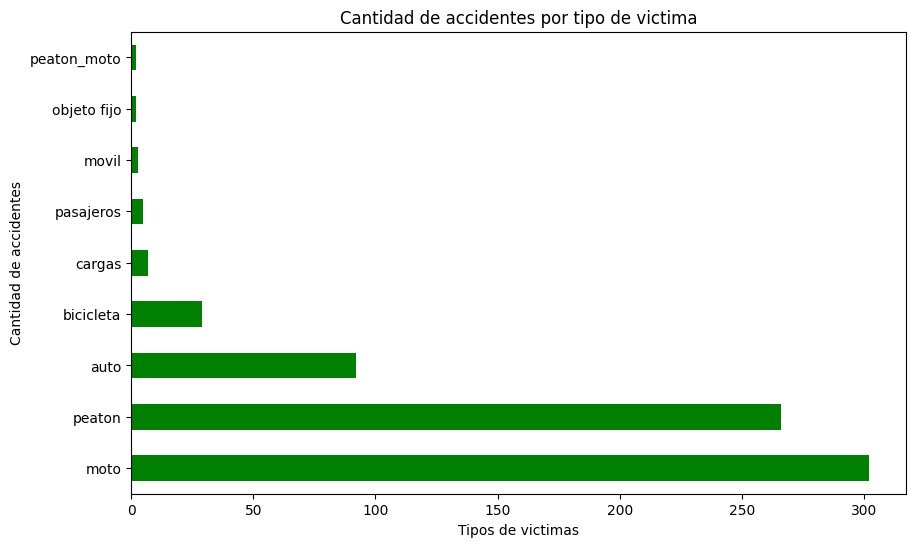

In [35]:
plt.figure(figsize=(10,6))
data = merge.Tipo_victima.value_counts()
data.plot(kind='barh',color='green')
plt.xlabel('Tipos de victimas')
plt.ylabel('Cantidad de accidentes')
plt.title('Cantidad de accidentes por tipo de victima')
plt.show()

Si analizamos  los accidentes por tipo de victima, vemos que las victimas en motocicletas, son las mas frecuentes, esto se debe a que andar en morocicleta a altas velocidades, provee una cierta fragilidad antes choques, mas que si se camina en la calle, por su velocidad por supuesto.

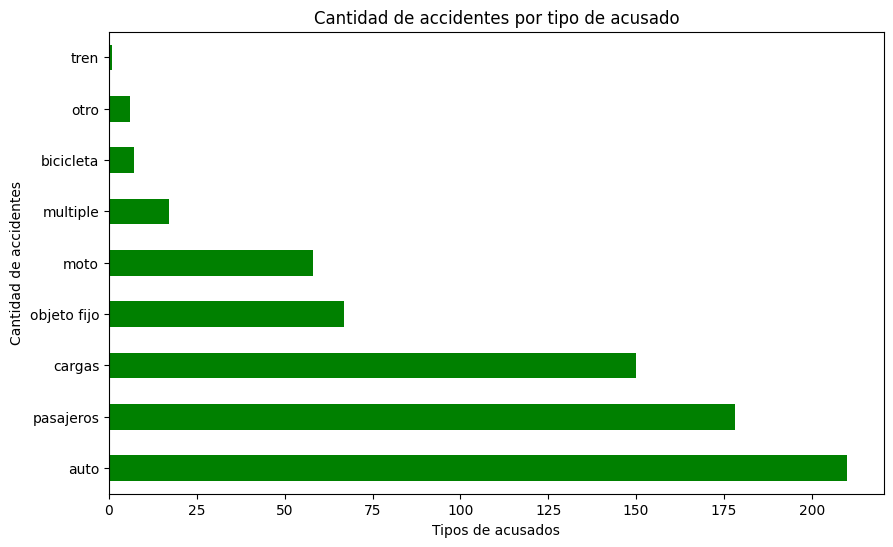

In [36]:
plt.figure(figsize=(10,6))
data = merge.Tipo_acusado.value_counts()
data.plot(kind='barh',color='green')
plt.xlabel('Tipos de acusados')
plt.ylabel('Cantidad de accidentes')
plt.title('Cantidad de accidentes por tipo de acusado')
plt.show()

Y si analizamos  los accidentes por tipo de acusado, vemos que los acusasdos mas frecuentes, son los automoviles, esto tiene sentido ya que en la mayoria de accidentes, de cualquier tipo, viales, se ven mas involucrados los automoviles que, por ejemplo, las motocicletas.